# Counterfactual emissions scenarios

A SIMPLE EMISSIONS DECOMPOSITION MODEL OF COUNTERFACTUAL EMISSIONS PATHWAYS from the article "Slameršak, A., Kallis, G., O'Neill, D.W., and Hickel, J. (2022). From low-growth to post-growth scenarios of climate mitigation. 2022".


# Introduction

The urgency of climate change mitigation has been recognised at the international governance stage since 1990. However, the general agreement on the problem has yet to translate into an effective action to curb global emissions, which have grown by 60% since 1990. As a result of increasing emissions, we are in a state of accelerated global heating and rapidly approaching the turning point beyond which it will be theoretically impossible to stabilize the global warming between 1.5 °C and 2 °C, as pledged by the Paris Agreement. To meet the Paris Agreement goals we need to keep total carbon emissions within the carbon budget limit, which is estimated at 340 GtCO2 for 1.5 °C and at 1090 GtCO2 for 2 °C of global warming. Staying within those carbon budgets will require a far-reaching and an unprecedented transformation of our economies, lifestyles, and energy systems (IPCC, 2018). In other words, adequate climate mitigation action requires a decisive break with the historical pathway of development.

In this exercise, we will explore by how much the key emissions drivers would need to change to stabilize global warming below 1.5 °C. Moreover, we will explore how the conditions for accomplishing sufficient emission reductions have changed due to increasing emissions over time. 

In [1]:
#-----IMPORTING LIBRARIES-----
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [3]:
#-----IMPORTING HISTORICAL DATA-----
df = pd.read_excel('data/counterfactual_scenarios_data.xlsx', 'Historical data')
df.head()

CO2_emissions = df['CO2 Emissions (GtCO2)'].to_numpy() # Global CO2 emissions from antropogenic activities [GtCO2]
Final_energy = df['Final Energy (EJ)'].to_numpy() * 10**9 # Final energy consumption [GJ]
GDP = df['GDP ($)'].to_numpy() #  Gross Domestic Product [$]
Population = df['Population '].to_numpy() #  Population [Number of people]
Low_carbon_penetration = df['Low carbon penetration (%)'].to_numpy() #  Share of Low-carbon energy in Final energy consumption [from 0% to 100%]

,Year,CO2 Emissions (GtCO2),Final Energy (EJ),GDP ($),Population,Low carbon penetration (%)
0,1990,22.734076,248.314377,3.790766e+13,5.280046e+09,19.275393
1,1991,23.207834,251.506410,3.847949e+13,5.368139e+09,19.572754
2,1992,22.482779,251.002503,3.916324e+13,5.452576e+09,19.907095
3,1993,22.732886,253.011096,3.974770e+13,5.537886e+09,19.979482
4,1994,22.894472,254.838148,4.091898e+13,5.622086e+09,20.134470


In [145]:
#-----DEFINING EMISSION DRIVERS-----
Energy_intensity = Final_energy/GDP  # Energy intensity of Gross Domestic Product [GJ/$]
Carbon_intensity_FF = CO2_emissions * 10**9 / (Final_energy * (1 - 0.01 * Low_carbon_penetration))  # Carbon intensity of energy [tCO2/GJ]
GDP_per_capita = GDP / Population # Global Gross Domestic Product per capita [$/capita]
Low_carbon_energy = Final_energy * Low_carbon_penetration * 0.01  # Final energy consumption from low-carbon sources (renewables & nuclear) [GJ]
FF_energy = Final_energy - Low_carbon_penetration  # Final energy consumption from fossil fuel sources [GJ]
Carbon_intensity_tot = CO2_emissions / Final_energy*10**9 # Carbon intensity of total final energy [tCO2/GJ]

In [92]:
#-----HISTORICAL AVERAGE CHANGES from 1990 to 2021-----
Avg_Energy_intensity_improvement = 100*((Energy_intensity[-1]/Energy_intensity[0])**(1/31)-1)  # Change in Energy intensity
Avg_Carbon_intensity_FF_improvement = 100*((Carbon_intensity_FF[-1]/Carbon_intensity_FF[0])**(1/31)-1)  # Change in Carbon intensity of fossil fuel sources (Carbon intensity can change due to fuel switching, for example from coal to natural gas
Avg_GDP_per_capita_growth = 100*((GDP_per_capita[-1]/GDP_per_capita[0])**(1/31)-1)  # Growth in GDP per capita
Avg_low_carbon_growth = 100*((Low_carbon_energy[-1]/Low_carbon_energy[0])**(1/31)-1)  # Growth in Low carbon energy
Population_growth = 100*((Population[-1]/Population[0])**(1/31)-1)  # Population growth

In [93]:
#----COUNTERFACTURAL ASSUMPTIONS-----
Multiplicator_Energy_intensity = 1.75  # [0 - no change, 1 - historical value, 2 - twice as fast (ambitious), 3 - very ambitiou, >3 (difficult to achieve)] - > By how much (faster/slower) was energy intensity to change compared to the historical value of 1.06% per year
counterfactual_intensity_improvement = Multiplicator_Energy_intensity*Avg_Energy_intensity_improvement

Multiplicator_Carbon_intensity = 1.75  # [-1 - transition to a coal-powered world,  0 - no change, 1 - historical value, 5 - switching from coal to gas (ambitious)] - > By how much (faster/slower) was carbon intensity of fossil fuels to change compared to the historical value of 0.06% per year
counterfactual_carbon_intensity_FF_improvement = Multiplicator_Carbon_intensity*Avg_Carbon_intensity_FF_improvement

Multiplicator_GDP_per_capita = 1  # [-1 -> deep degrowth scenario, -0.5 -> slow degrowth, 0 -> steady-state economy, 0.5 -> secular stagnation, 1 - historical value, 2 - fast GDP growth] - > By how much (faster/slower) was GDP per capita to change compared to the historical value of 1.41% per year
counterfactual_GDP_per_capita_growth = Multiplicator_GDP_per_capita*Avg_GDP_per_capita_growth

Multiplicator_low_carbon = 2  # [1 - historical value (slow deployment of renewables), 1.5 -> 50% faster deployment (moderately ambitiou), 2-> 100% faster deployment (very ambitious)] - > By how much (faster/slower) was growth of low-carbon energy compared to the historical value of 1.93% per year
counterfactual_low_carbon_growth = Multiplicator_low_carbon*Avg_low_carbon_growth

Multiplicator_population = 1  # [0.5 -> Empty planet scenario, 1 - historical value, 1.5 -> 50% faster population growth] - > By how much (faster/slower) was population growth compared to the historical value of 1.28% per year
counterfactual_population_growth = Multiplicator_population*Population_growth

In [94]:
#-----TIME RANGE-----
year1 = np.arange(1990, 2021+1, 1) # Our data are from 1990 to 2021  
first_year = 1990  # Begining of the time series
start_year = 1991  # What year do you want to deviate from the historical trajectory?

start = start_year - first_year

In [95]:
#-----EMISSIONS FACTORS IN COUNTERFACTURAL SCENARIOS-----
counterfactual_CO2_emissions = np.zeros(32)
counterfactual_Energy_intensity = np.zeros(32)
counterfactual_Low_carbon_penetration = np.zeros(32)
counterfactual_Low_carbon_energy = np.zeros(32)
counterfactual_Final_energy = np.zeros(32)
counterfactual_FF_energy = np.zeros(32)
counterfactual_Carbon_intensity_FF = np.zeros(32)
counterfactual_GDP_per_capita = np.zeros(32)
counterfactual_Population = np.zeros(32)

In [96]:
#-----COUNTERFACTUAL SCENARIOS ARE THE SAME AS HISTORICAL SCENARIO BEFORE THE START YEAR-----
counterfactual_Energy_intensity[0:start] = Energy_intensity[0:start]
counterfactual_Final_energy[0:start] = Final_energy[0:start]
counterfactual_Low_carbon_energy[0:start] = Low_carbon_energy[0:start]
counterfactual_FF_energy[0:start] = FF_energy[0:start]
counterfactual_Low_carbon_penetration[0:start] = counterfactual_Low_carbon_energy[0:start] / counterfactual_Final_energy[0:start]
counterfactual_Carbon_intensity_FF[0:start] = Carbon_intensity_FF[0:start]
counterfactual_CO2_emissions[0:start] = CO2_emissions[0:start]
counterfactual_GDP_per_capita[0:start] = GDP_per_capita[0:start]
counterfactual_Population[0:start] = Population[0:start]

In [97]:
#-----IPAT EQUATION FOR THE MODELLING OF COUNTERFACTUAL SCENARIOS-----
for j in np.arange(start-1, 31, 1):

    if Multiplicator_Energy_intensity == 1:
        counterfactual_Energy_intensity[j+1] = Energy_intensity[j+1] 
    else:
        counterfactual_Energy_intensity[j+1] = counterfactual_Energy_intensity[j]*(1 + 0.01*counterfactual_intensity_improvement);

    if Multiplicator_low_carbon == 1:
        counterfactual_Low_carbon_energy[j+1] = Low_carbon_energy[j+1] 
    else:
        counterfactual_Low_carbon_energy[j+1]  = counterfactual_Low_carbon_energy[j]*(1 + 0.01*counterfactual_low_carbon_growth);  

    if Multiplicator_GDP_per_capita == 1:
        counterfactual_GDP_per_capita[j+1]  = GDP_per_capita[j+1] 
    else:
        counterfactual_GDP_per_capita[j+1] = counterfactual_GDP_per_capita[j]*(1 + 0.01*counterfactual_GDP_per_capita_growth);

    if Multiplicator_population == 1:
        counterfactual_Population[j+1] = Population[j+1] 
    else:
        counterfactual_Population[j+1] = counterfactual_Population[j]*(1 + 0.01*counterfactual_population_growth);  

    if Multiplicator_Carbon_intensity == 1:
        counterfactual_Carbon_intensity_FF[j+1] = Carbon_intensity_FF[j+1] 
    else:
        counterfactual_Carbon_intensity_FF[j+1] = counterfactual_Carbon_intensity_FF[j]*(1 + 0.01*counterfactual_carbon_intensity_FF_improvement)
    
    counterfactual_Final_energy[j+1] = counterfactual_Energy_intensity[j+1]*counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]
    counterfactual_FF_energy[j+1] = counterfactual_Final_energy[j+1] - counterfactual_Low_carbon_energy[j+1]
    counterfactual_Low_carbon_penetration[j+1] = counterfactual_Low_carbon_energy[j+1]/counterfactual_Final_energy[j+1]
    counterfactual_CO2_emissions[j+1] = (counterfactual_Energy_intensity[j+1]
        *(1 - counterfactual_Low_carbon_penetration[j+1])*counterfactual_Carbon_intensity_FF[j+1]
        *counterfactual_GDP_per_capita[j+1]*counterfactual_Population[j+1]*10**(-9))

In [98]:
#-----DECOMPOSITION FACTORS IN THE COUNTERFACTUAL SCENARIOS------
Carbon_intensity_counterfactual_tot = counterfactual_CO2_emissions/counterfactual_Final_energy;
GDP_counterfactual = counterfactual_GDP_per_capita*counterfactual_Population;
Energy_intensity_counterfactual = counterfactual_Final_energy/GDP_counterfactual;

In [99]:
#-----ANNUAL GROWTH RATES-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

In [100]:
#-----DIFFERENCE IN TOTAL ANTROPOGENIC EMISSIONS BETWEEN REAL HISTORY AND THE COUNTERFACTUAL SCENARIO-----
Diff_counterfactual = np.sum((CO2_emissions[start-1:] - counterfactual_CO2_emissions[start-1:]))

#-----1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE HISTORICAL SCENARIO-----
Emissions_15 = [CO2_emissions[31], 1/2*CO2_emissions[31], 1/4*CO2_emissions[31], 1/8*CO2_emissions[31]]  # we need to halve carbon emissions every decade
Emissions_15_interp = CubicSpline([2021, 2030, 2040, 2050], Emissions_15)(np.arange(2021, 2051, 1))

In [101]:
#-----FINDING THE 1.5 DEGREE COMPATIBLE PATHWAY FROM 2021 UNDER THE COUNTERFACTUAL SCENARIO-----
r = np.arange(-0.15, 0.01, 0.001)  
aux = np.zeros(160);

for t in np.arange(0, 160, 1):
    aux[t] = sum(counterfactual_CO2_emissions[31]*(1+r[t])**np.arange(1, 60, 1)) - np.sum(Emissions_15_interp) - Diff_counterfactual

minVal = np.min(np.abs(aux))
i = np.where(np.abs(aux) == minVal)[0][0]

counterfactual_Emissions_15 = counterfactual_CO2_emissions[31]*(1+r[i])**np.arange(0, 60, 1)

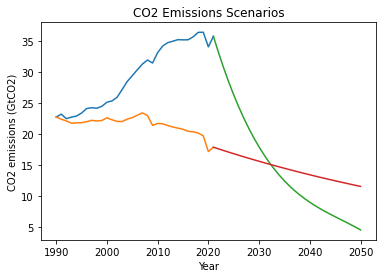

In [103]:
plt.plot(year1, CO2_emissions, label='Historical Emissions')
plt.plot(year1, counterfactual_CO2_emissions, label='Counterfactual scenario')
plt.plot(year2, Emissions_15_interp, label='1.5-Degree Pathway')
plt.plot(year2, counterfactual_Emissions_15[0:30]);
plt.xlabel('Year')
plt.ylabel('CO2 emissions (GtCO2)')
plt.title('CO2 Emissions Scenarios');

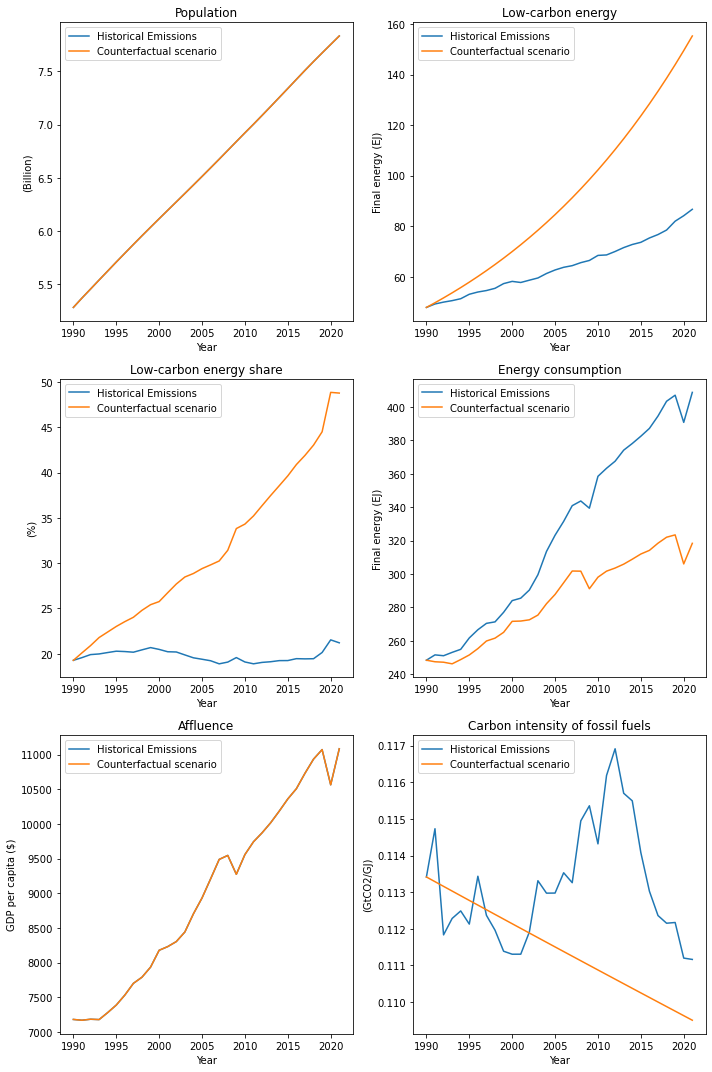

In [104]:
#-----EMISSIONS FACTORS AND AUXILIARY VARIABLES-----

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Population / 10**9, counterfactual_Population / 10**9, '(Billion)', 'Population'),
    (Low_carbon_energy/ 10**9, counterfactual_Low_carbon_energy/ 10**9, 'Final energy (EJ)', 'Low-carbon energy'),
    (Low_carbon_penetration, 100*counterfactual_Low_carbon_penetration, '(%)', 'Low-carbon energy share'),
    (Final_energy/10**9, counterfactual_Final_energy/10**9, 'Final energy (EJ)', 'Energy consumption'),
    (GDP_per_capita, counterfactual_GDP_per_capita, 'GDP per capita ($)', 'Affluence'),
    (Carbon_intensity_FF, counterfactual_Carbon_intensity_FF, '(GtCO2/GJ)', 'Carbon intensity of fossil fuels'),
]

for ax, (x1, x2, label, title) in zip(axs, plot_vars):

    ax.plot(year1, x1, label='Historical Emissions')
    ax.plot(year1, x2, label='Counterfactual scenario')
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label);
    ax.set_xlabel('Year');

plt.tight_layout()

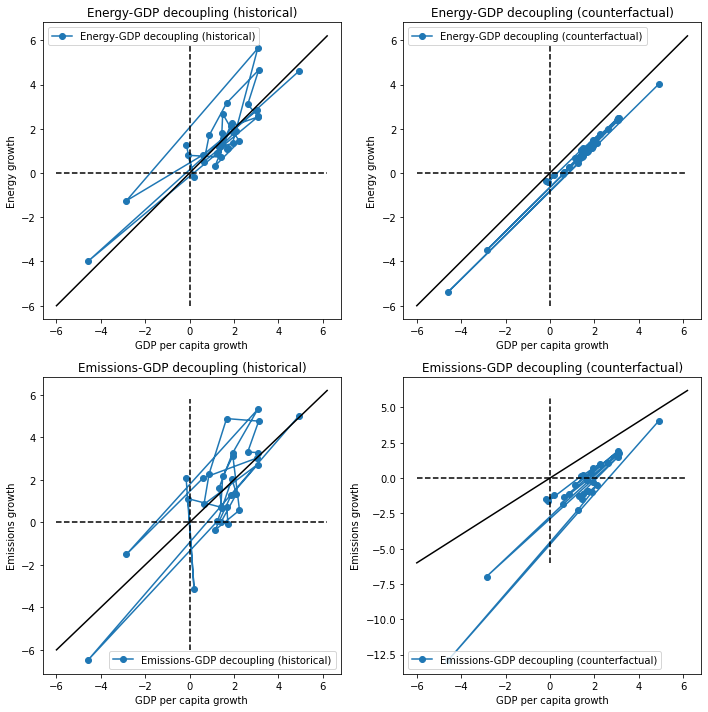

In [105]:
#-----DECOUPLING ANALYSIS-----
#-----Annual growth rates-----
Growth_GDP_historical = 100*(GDP_per_capita[1:]/GDP_per_capita[:-1] - 1)
Growth_Energy_historical = 100*(Final_energy[1:]/Final_energy[:-1] - 1)
Growth_CO2_historical = 100*(CO2_emissions[1:]/CO2_emissions[:-1] - 1)

Growth_GDP_counterfactual = 100*(counterfactual_GDP_per_capita[1:]/counterfactual_GDP_per_capita[:-1] - 1)
Growth_Energy_counterfactual = 100*(counterfactual_Final_energy[1:]/counterfactual_Final_energy[:-1] - 1)
Growth_CO2_counterfactual = 100*(counterfactual_CO2_emissions[1:]/counterfactual_CO2_emissions[:-1] - 1)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = [item for sublist in axs for item in sublist]

plot_vars = [
    (Growth_GDP_historical, Growth_Energy_historical, 'GDP per capita growth', 'Energy growth', 'Energy-GDP decoupling (historical)'),
    (Growth_GDP_counterfactual, Growth_Energy_counterfactual, 'GDP per capita growth', 'Energy growth', 'Energy-GDP decoupling (counterfactual)'),
    (Growth_GDP_historical, Growth_CO2_historical, 'GDP per capita growth', 'Emissions growth', 'Emissions-GDP decoupling (historical)'),
    (Growth_GDP_counterfactual, Growth_CO2_counterfactual, 'GDP per capita growth', 'Emissions growth', 'Emissions-GDP decoupling (counterfactual)'),
]

for ax, (x1, x2, label1, label2, title) in zip(axs, plot_vars):

    ax.plot(x1, x2, label=title, marker="o", linestyle="-")
    ax.plot(np.arange(-6.0, 6.4, 0.2), np.arange(-6.0, 6.4, 0.2), color = ([0, 0, 0]));
    ax.plot(np.arange(-6.0, 6.4, 0.2), np.zeros(62), color = ([0, 0, 0]), linestyle="--");
    ax.plot(np.zeros(60), np.arange(-6.0, 6.0, 0.2), color = ([0, 0, 0]), linestyle="--");
    ax.legend()
    ax.set_title(title);
    ax.set_ylabel(label2);
    ax.set_xlabel(label1);

plt.tight_layout()


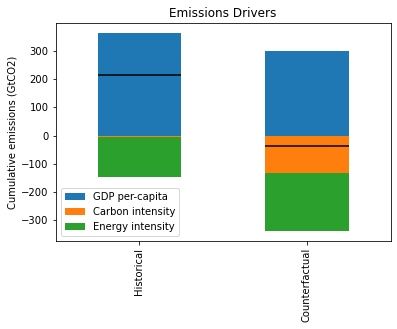

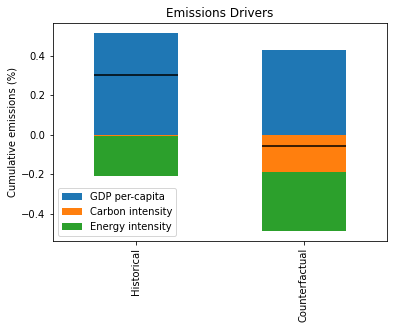

In [163]:
Ci_driver = np.zeros(32)
Energy_driver = np.zeros(32)
GDP_driver = np.zeros(32)

Ci_driver_counterfactual = np.zeros(32)
Energy_driver_counterfactual = np.zeros(32)
GDP_driver_counterfactual = np.zeros(32)

Carbon_intensity_tot_counterfactual = counterfactual_CO2_emissions/counterfactual_Final_energy*10**9
GDP_counterfactual = counterfactual_GDP_per_capita*counterfactual_Population
Energy_intensity_counterfactual = counterfactual_Final_energy/GDP_counterfactual

for t in np.arange(0, 31, 1):
  Ci_driver[t+1] = 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t] + Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1])
  Energy_driver[t+1] = 1/3*(Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] + Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1])
  GDP_driver[t+1] = 1/3*(Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t]*GDP[t]) + 1/6*(Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t]*GDP[t] + Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t]*Energy_intensity[t+1]*GDP[t]) + 1/3*(Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t+1] - Carbon_intensity_tot[t+1]*Energy_intensity[t+1]*GDP[t])

  Ci_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1])
  Energy_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1])
  GDP_driver_counterfactual[t+1] = 1/3*(Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t]) + 1/6*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t]*GDP_counterfactual[t] + Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t]) + 1/3*(Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t+1] - Carbon_intensity_tot_counterfactual[t+1]*Energy_intensity_counterfactual[t+1]*GDP_counterfactual[t])  

Carbon_Intensity_contribution = np.sum(np.arange(32,0,-1)*Ci_driver)/10**9
Energy_Intensity_contribution = np.sum(np.arange(32,0,-1)*Energy_driver)/10**9
GDP_contribution = np.sum(np.arange(32,0,-1)*GDP_driver)/10**9
Norm_start = 31*CO2_emissions[start-1]
Net_change = np.sum(100*[GDP_contribution/Norm_start, Carbon_Intensity_contribution/Norm_start, Energy_Intensity_contribution/Norm_start])
Net_sum = GDP_contribution + Carbon_Intensity_contribution + Energy_Intensity_contribution

Carbon_Intensity_contribution_counterfactual = np.sum(np.arange(32,0,-1)*Ci_driver_counterfactual)/10**9
Energy_Intensity_contribution_counterfactual = np.sum(np.arange(32,0,-1)*Energy_driver_counterfactual)/10**9
GDP_contribution_counterfactual = np.sum(np.arange(32,0,-1)*GDP_driver_counterfactual)/10**9
Norm_start_counterfactual = 31*counterfactual_CO2_emissions[start]
Net_change_counterfactual = np.sum(100*[GDP_contribution_counterfactual/Norm_start_counterfactual, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual])
Net_sum_counterfactual = GDP_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual + Energy_Intensity_contribution_counterfactual


df = pd.DataFrame(index=['Historical', 'Counterfactual'], 
                  data={'GDP per-capita': [GDP_contribution, GDP_contribution_counterfactual], 
                        'Carbon intensity': [Carbon_Intensity_contribution, Carbon_Intensity_contribution_counterfactual], 
                        'Energy intensity': [Energy_Intensity_contribution, Energy_Intensity_contribution_counterfactual]})

ax = df.plot(kind="bar", stacked=True)
ax.set_title('Emissions Drivers');
ax.set_ylabel('Cumulative emissions (GtCO2)');
plt.hlines(GDP_contribution + Carbon_Intensity_contribution + Energy_Intensity_contribution , xmin=-0.25, xmax=0.25, color = ([0, 0, 0]))
plt.hlines(GDP_contribution_counterfactual + Carbon_Intensity_contribution_counterfactual + Energy_Intensity_contribution_counterfactual , xmin=0.75, xmax=1.25, color = ([0, 0, 0]))



plt.show()

df = pd.DataFrame(index=['Historical', 'Counterfactual'], 
                  data={'GDP per-capita': [GDP_contribution/Norm_start, GDP_contribution_counterfactual/Norm_start_counterfactual], 
                        'Carbon intensity': [Carbon_Intensity_contribution/Norm_start, Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual], 
                        'Energy intensity': [Energy_Intensity_contribution/Norm_start, Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual]})

ax = df.plot(kind="bar", stacked=True)
ax.set_title('Emissions Drivers');
ax.set_ylabel('Cumulative emissions (%)');
plt.hlines(GDP_contribution/Norm_start + Carbon_Intensity_contribution/Norm_start + Energy_Intensity_contribution/Norm_start , xmin=-0.25, xmax=0.25, color = ([0, 0, 0]))
plt.hlines(GDP_contribution_counterfactual/Norm_start_counterfactual + Carbon_Intensity_contribution_counterfactual/Norm_start_counterfactual + Energy_Intensity_contribution_counterfactual/Norm_start_counterfactual , xmin=0.75, xmax=1.25, color = ([0, 0, 0]))



plt.show()
